In [1]:
#Import data manupilation 
import pandas as pd
import numpy as np
#Import data visualization  libraries 
import seaborn  as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings( 'ignore' )

#import logging
import logging
logging.basicConfig (level=logging.INFO,
                    format = ' %(asctime)s - %(levelname)s - %(message)s' ,
                    filemode ='w',
                    filename = 'model.log',force =True)

In [2]:
logging.info('Import Dataset For  Model Building..')

In [3]:
url = 'https://raw.githubusercontent.com/harshthorve284/CementPrediction_Model/refs/heads/main/Concrete_Data%20(2).csv'

df=pd.read_csv(url)
df.sample(frac=1)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
864,298.0,0.0,107.0,210.0,11.0,880.0,744.0,28,31.87
512,424.0,22.0,132.0,168.0,8.9,822.0,750.0,3,32.11
757,350.0,0.0,0.0,203.0,0.0,974.0,775.0,7,18.13
906,266.0,112.0,87.0,178.0,10.0,910.0,745.0,28,39.42
231,213.7,98.1,24.5,181.7,6.9,1065.8,785.4,28,45.71
...,...,...,...,...,...,...,...,...,...
932,154.0,174.0,185.0,228.0,7.0,845.0,612.0,28,24.34
489,387.0,20.0,94.0,157.0,13.9,938.0,845.0,3,25.51
34,190.0,190.0,0.0,228.0,0.0,932.0,670.0,365,53.69
777,339.0,0.0,0.0,185.0,0.0,1069.0,754.0,28,31.84


In [4]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [7]:
import statsmodels.api as sm
#X INDEPENDENT COLUMN
X = df.drop(columns = 'Concrete compressive strength(MPa, megapascals) ',axis = 1)
#y DEPENDED COLUMN
y = df['Concrete compressive strength(MPa, megapascals) ']

In [9]:
X =sm.add_constant(X)

model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                           
============================================================================================================
Dep. Variable:     Concrete compressive strength(MPa, megapascals)    R-squared:                       0.616
Model:                                                          OLS   Adj. R-squared:                  0.613
Method:                                               Least Squares   F-statistic:                     204.3
Date:                                              Thu, 29 May 2025   Prob (F-statistic):          6.29e-206
Time:                                                      19:09:45   Log-Likelihood:                -3869.0
No. Observations:                                              1030   AIC:                             7756.
Df Residuals:                                                  1021   BIC:                             7800.
Df Model:                                                         8                                         
Covariance Type:                                          nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                   -23.3312     26.586     -0.878      0.380     -75.500      28.837
Cement (component 1)(kg in a m^3 mixture)                 0.1198      0.008     14.113      0.000       0.103       0.136
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     0.1039      0.010     10.247      0.000       0.084       0.124
Fly Ash (component 3)(kg in a m^3 mixture)                0.0879      0.013      6.988      0.000       0.063       0.113
Water  (component 4)(kg in a m^3 mixture)                -0.1499      0.040     -3.731      0.000      -0.229      -0.071
Superplasticizer (component 5)(kg in a m^3 mixture)       0.2922      0.093      3.128      0.002       0.109       0.476
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      0.0181      0.009      1.926      0.054      -0.000       0.037
Fine Aggregate (component 7)(kg in a m^3 mixture)         0.0202      0.011      1.887      0.059      -0.001       0.041
Age (day)                                                 0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.378   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.304
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [13]:
#checking desscriptive stats:eda
#univariate analysis
from collections import OrderedDict
stats = []
for i in df.columns:
    numerical_stats = OrderedDict({
        'Feature':i,
        'Mean':df[i].mean(),
        'Median':df[i].median(),
        'Q1':df[i].quantile (0.25),
        'Q3':df[i].quantile (0.75),
        'IQR':df[i].quantile(0.75) - df[i].quantile(0.25),
        'Standard Deviation':df[i].std(),
        'Skweness':df[i].skew(),
        'Kurtosis':df[i].kurt()
        
    })
    stats.append(numerical_stats)
    # saving all orderdict dic into a dataframe : structured format
    report = pd.DataFrame(stats)

report
    

,Feature,Mean,Median,Q1,Q3,IQR,Standard Deviation,Skweness,Kurtosis
0,Cement (component 1)(kg in a m^3 mixture),281.167864,272.900,192.375,350.000,157.625,104.506364,0.509481,-0.520652
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,73.895825,22.000,0.000,142.950,142.950,86.279342,0.800717,-0.508175
2,Fly Ash (component 3)(kg in a m^3 mixture),54.188350,0.000,0.000,118.300,118.300,63.997004,0.537354,-1.328746
3,Water (component 4)(kg in a m^3 mixture),181.567282,185.000,164.900,192.000,27.100,21.354219,0.074628,0.122082
4,Superplasticizer (component 5)(kg in a m^3 mix...,6.204660,6.400,0.000,10.200,10.200,5.973841,0.907203,1.411269
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,972.918932,968.000,932.000,1029.400,97.400,77.753954,-0.040220,-0.599016
6,Fine Aggregate (component 7)(kg in a m^3 mixture),773.580485,779.500,730.950,824.000,93.050,80.175980,-0.253010,-0.102177
7,Age (day),45.662136,28.000,7.000,56.000,49.000,63.169912,3.269177,12.168989
8,"Concrete compressive strength(MPa, megapascals)",35.817961,34.445,23.710,46.135,22.425,16.705742,0.416977,-0.313725


In [19]:
'''
Note :
1. positive kurtosis leptokurtic
2. Normal kurtosis misokurtic
3. Negative distribution paltikurtic
.....................................
1. positive skewness : mode <median <mean
2. noskewness (normally distribute): mean=median=mode
3.negative: mean<median<mode
'''

'\nNote :\n1. positive kurtosis leptokurtic\n2. Normal kurtosis misokurtic\n3. Negative distribution paltikurtic\n.....................................\n1. positive skewness : mode <median <mean\n2. noskewness (normally distribute): mean=median=mode\n3.negative: mean<median<mode\n'

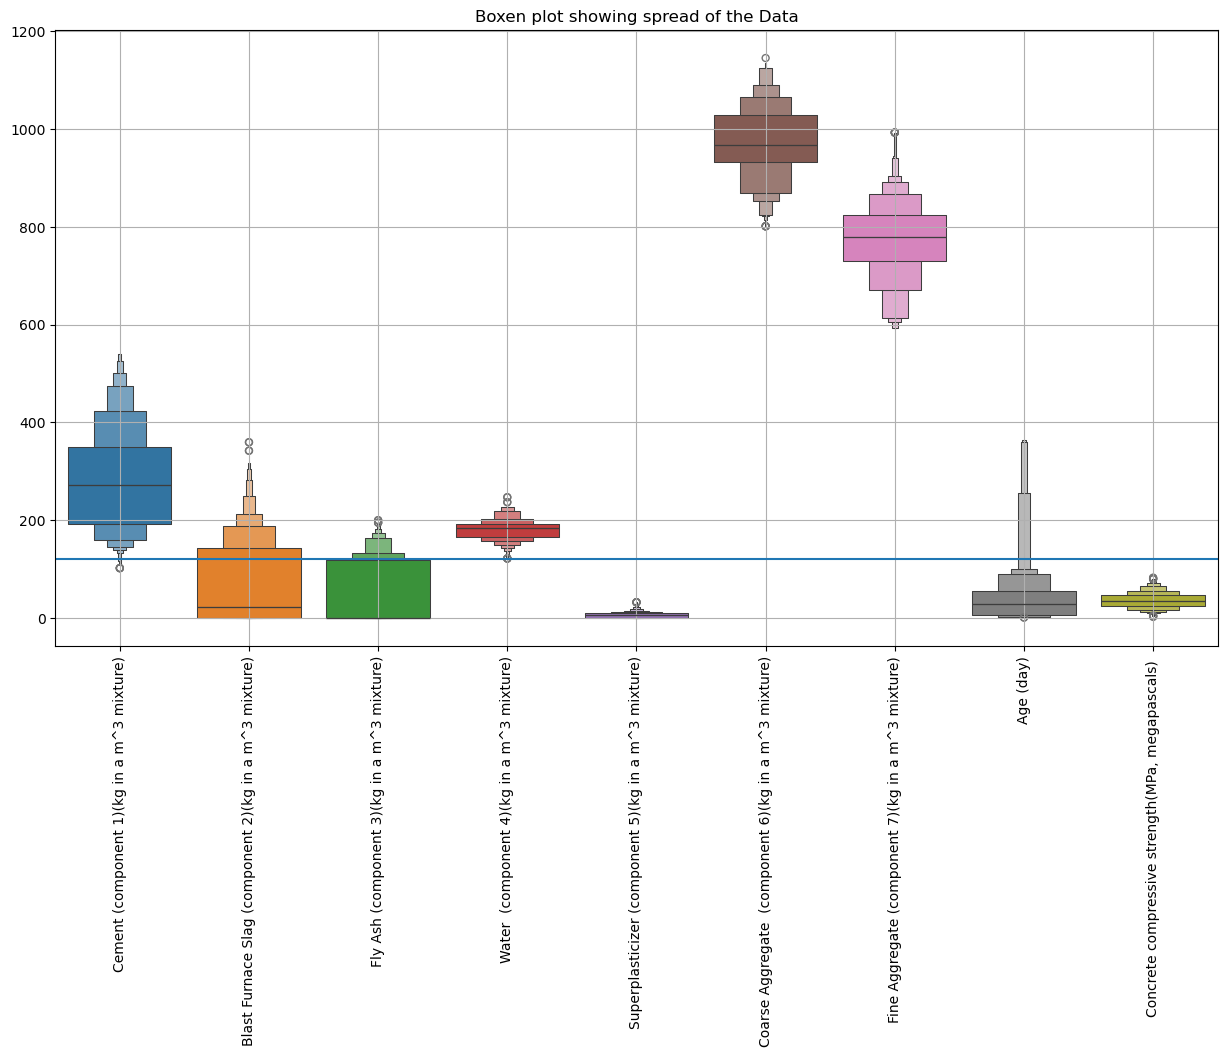

In [37]:
plt.figure(figsize = (15,8))
sns.boxenplot(df)
plt.title('Boxen plot showing spread of the Data')
plt.axhline(120)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

Text(0.5, 1.0, 'Heatmap showing CorrealatiioCorrelation w,r,t Target Column ')

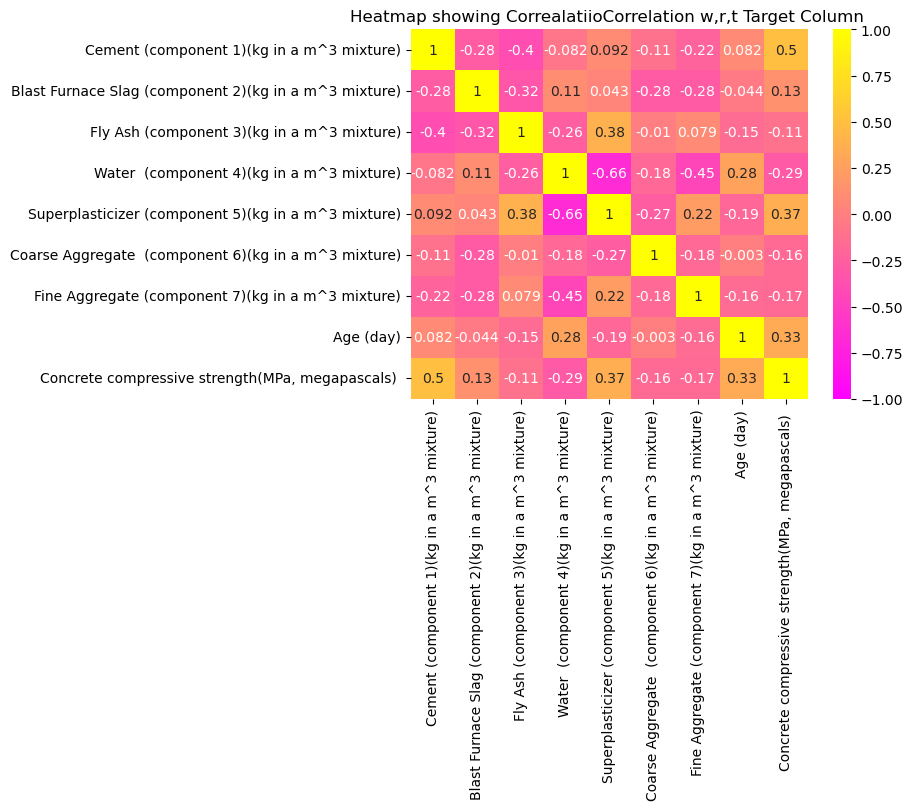

In [67]:
sns.heatmap(df.corr(),annot=True,center=0,vmax=1,vmin=-1,cmap='spring')
plt.title("Heatmap showing CorrealatiioCorrelation w,r,t Target Column ")

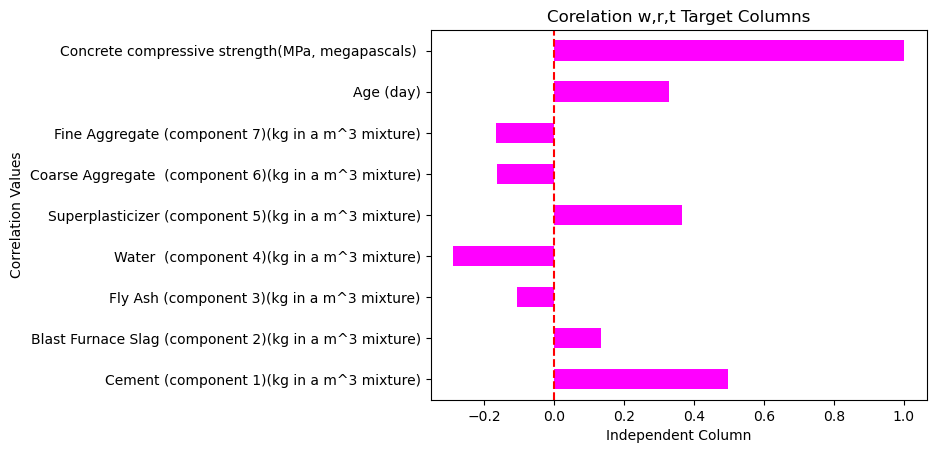

In [105]:
df.corr()['Concrete compressive strength(MPa, megapascals) '].plot(kind ='barh',cmap= 'spring')
plt.axvline(0,linestyle = '--' ,color = 'red')
plt.title('Corelation w,r,t Target Columns')
plt.ylabel('Correlation Values')
plt.xlabel('Independent Column')
plt.show()